In [13]:
# Imports

import requests
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
# Getting the reviews

texts = []
# The day I accessed the website, there were 4 pages of reviews
for i in range(1, 30):
  url = 'https://www.rottentomatoes.com/tv/squid_game/s01/reviews?type=&sort=&page='+str(1)
  res = requests.get(url)
  html_page = res.text

  soup = BeautifulSoup(html_page, 'html.parser')
  soup.prettify()

  for review in soup.find_all('div', class_='critic__review-quote'):
    review = review.text.replace('\t', '')
    review = review.replace('\n', '')
    review = review.replace('\r', '')
    texts += word_tokenize(review)

texts_aux = []
print(nltk.pos_tag(texts))

# Selecting only the adjectives
for word in nltk.pos_tag(texts):
  if word[1] == 'JJ':
    texts_aux.append(word[0])
print(texts_aux)

[('``', '``'), ('Squid', 'JJ'), ('Game', 'NNP'), ("''", "''"), ('is', 'VBZ'), ('deservedly', 'RB'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('hottest', 'JJS'), ('shows', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('year', 'NN'), (',', ','), ('and', 'CC'), ('it', 'PRP'), ('highlights', 'VBZ'), ('the', 'DT'), ('good', 'JJ'), ('streaming', 'NN'), ('can', 'MD'), ('do', 'VB'), ('in', 'IN'), ('regards', 'NNS'), ('to', 'TO'), ('breaking', 'VBG'), ('down', 'RP'), ('cultural', 'JJ'), ('barriers', 'NNS'), ('and', 'CC'), ('exposing', 'VBG'), ('viewers', 'NNS'), ('to', 'TO'), ('masterworks', 'NNS'), ('from', 'IN'), ('across', 'IN'), ('the', 'DT'), ('world', 'NN'), ('they', 'PRP'), ('would', 'MD'), ('otherwise', 'RB'), ('not', 'RB'), ('have', 'VB'), ('access', 'NN'), ('to', 'TO'), ('.', '.'), ('``', '``'), ('Squid', 'JJ'), ('Game', 'NNP'), ("''", "''"), ('is', 'VBZ'), ('a', 'DT'), ('well-produced', 'JJ'), ('thriller', 'NN'), ('with', 'IN'), ('a', 'DT'), ('couple', 'NN'), ('of', 'IN'), ('decent', 'JJ'

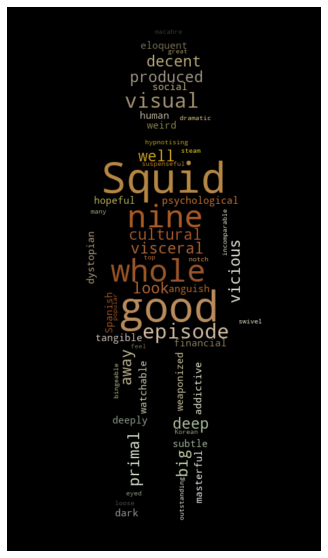

In [15]:
# Import image to np.array
mask = np.array(Image.open('/content/hd-squid-game-doll-girl-transparent-png-31633018956m4vamdyabz.png')) # Image of the squid game doll
image_colors = ImageColorGenerator(mask) # Getting the image colors

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(10, 10))
    # Display image
    plt.imshow(wordcloud.recolor(color_func=image_colors,random_state=3),
           interpolation="bilinear") 
    # No axis details
    plt.axis("off");


# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(' '.join(texts_aux))
# Plot
plot_cloud(wordcloud)